<div style="padding:20px; 
            color:#010966;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:#010966;
            background-color:#237bf7;
            font-family:newtimeroman;
            overflow:hidden;
            font-weight:500">S&P500 ESG Scores</div>
            
</br> 


<center>
<img src="https://github.com/DorobantuDiana/DS_Projects/blob/main/objects/esg.png?raw=true" width=600>
</center>

---
<br>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#010966;font-family:newtimeroman;color:#237bf7;font-size:160%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   

1. [Dataset](#1)
    
2. [Libraries](#2)
   
3. [Data Processing](#3)
    
4. [ESG Score Distribution Analysis](#4)
    
5. [Sector & Industry Analysis](#5) 
    
6. [ESG Risk Level Analysis](#6)
     
<br>  
    
---

<a id="1"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#010966;font-family:newtimeroman;color:#237bf7;font-size:160%;text-align:center;border-radius:10px 10px;">Dataset</p> 
    
This dataset is dedicated to featuring companies listed in the S&P 500 index, offering a valuable resource for researchers, investors, analysts, and policy-makers interested in understanding the sustainability and governance practices of these prominent corporations. Whether you're examining trends, evaluating ESG performance, or making investment choices, this dataset provides insights into the ESG performance and risk profiles of S&P 500 companies.
    
More information about the dataset you can find [here](https://www.kaggle.com/datasets/pritish509/s-and-p-500-esg-risk-ratings).

<a id="2"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#010966;font-family:newtimeroman;color:#237bf7;font-size:160%;text-align:center;border-radius:10px 10px;">Libraries</p>

In [1]:
# Data Analysis
import numpy as np
import pandas as pd
from scipy import stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate 
from wordcloud import WordCloud
import plotly.express as px

# No Warnings Display
import warnings
warnings.filterwarnings('ignore')

<a id="3"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#010966;font-family:newtimeroman;color:#237bf7;font-size:160%;text-align:center;border-radius:10px 10px;">Data Processing</p> 

In [2]:
data = pd.read_csv('/kaggle/input/s-and-p-500-esg-risk-ratings/SP 500 ESG Risk Ratings.csv')
print(f"Shape of the dataset: {data.shape}")
data.head()

Shape of the dataset: (503, 15)


,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,"18,000","Agilent Technologies, Inc. provides applicatio...",15.0,0.3,6.3,8.6,Low,1.0,11th percentile,Low
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,"132,500","American Airlines Group Inc., through its subs...",29.0,12.0,5.0,12.0,Moderate,2.0,62nd percentile,NaN
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,"40,000","Advance Auto Parts, Inc. provides automotive r...",12.0,0.0,3.0,8.0,Moderate,2.0,4th percentile,Negligible
3,AAPL,Apple Inc,"One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,Consumer Electronics,"164,000","Apple Inc. designs, manufactures, and markets ...",17.0,0.6,9.2,6.9,Significant,3.0,15th percentile,Low
4,ABBV,Abbvie Inc,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers—General,"50,000","AbbVie Inc. discovers, develops, manufactures,...",28.0,1.1,9.9,16.8,Significant,3.0,55th percentile,Medium


In [3]:
data_describe = (
    data.describe()
    .drop("count", axis=0)
    .style.background_gradient(axis=0, cmap="mako")
    .set_properties(**{"text-align": "center"})
    .set_table_styles([{"selector": "th", "props": [("background-color", "k")]}])
    .set_caption("Summary Statistics")
)

data_describe

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
mean,21.422633,5.678984,6.673903,9.045035,1.896074
std,7.264458,5.339965,2.201049,3.813788,0.940748
min,7.000000,0.000000,3.000000,1.100000,0.000000
25%,16.000000,1.500000,5.000000,6.600000,1.000000
50%,21.000000,3.800000,6.000000,8.700000,2.000000
75%,26.000000,8.900000,7.700000,11.600000,2.000000
max,46.000000,25.000000,15.500000,21.000000,5.000000


In [4]:
def check(data):
    l = []
    columns = data.columns
    for col in columns:
        instances = data[col].count()
        dtypes = data[col].dtype
        unique = data[col].nunique()
        sum_null = data[col].isnull().sum()
        duplicates = data.duplicated().sum()
        l.append([col, dtypes, instances, unique, sum_null, duplicates])
    data_check = pd.DataFrame(l, columns=["column", "dtype", "instances", "unique", "sum_null", "duplicates"])
    return data_check

# check(data)

# Remove rows with null values in Sector and Total ESG Risk Score
data = data.dropna(subset=['Sector','Total ESG Risk score'])

# Reset the index after removing rows
data = data.reset_index(drop=True)

print(f"Shape of the dataset: {data.shape}")

data_check = (
    check(data)
    .style.background_gradient(axis=0, cmap="mako")
    .set_properties(**{"text-align": "center"})
    .set_table_styles([{"selector": "th", "props": [("background-color", "k")]}])
    .set_caption("Data Info")
)

data_check

Shape of the dataset: (432, 15)


,column,dtype,instances,unique,sum_null,duplicates
0,Symbol,object,432,432,0,0
1,Name,object,432,432,0,0
2,Address,object,432,432,0,0
3,Sector,object,432,11,0,0
4,Industry,object,432,108,0,0
5,Full Time Employees,object,427,358,5,0
6,Description,object,432,432,0,0
7,Total ESG Risk score,float64,432,36,0,0
8,Environment Risk Score,float64,432,134,0,0
9,Governance Risk Score,float64,432,91,0,0


<a id="4"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#010966;font-family:newtimeroman;color:#237bf7;font-size:160%;text-align:center;border-radius:10px 10px;">ESG Score Distribution Analysis</p> 

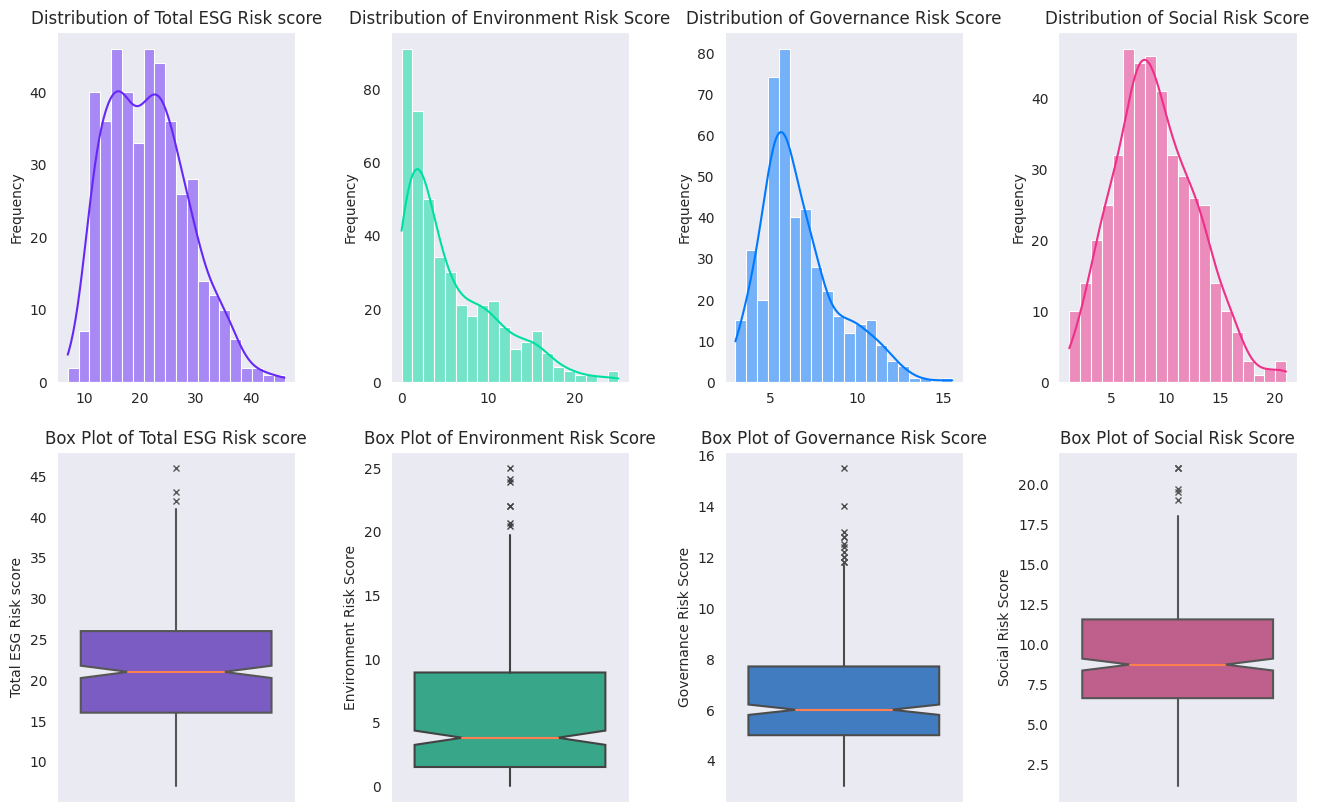

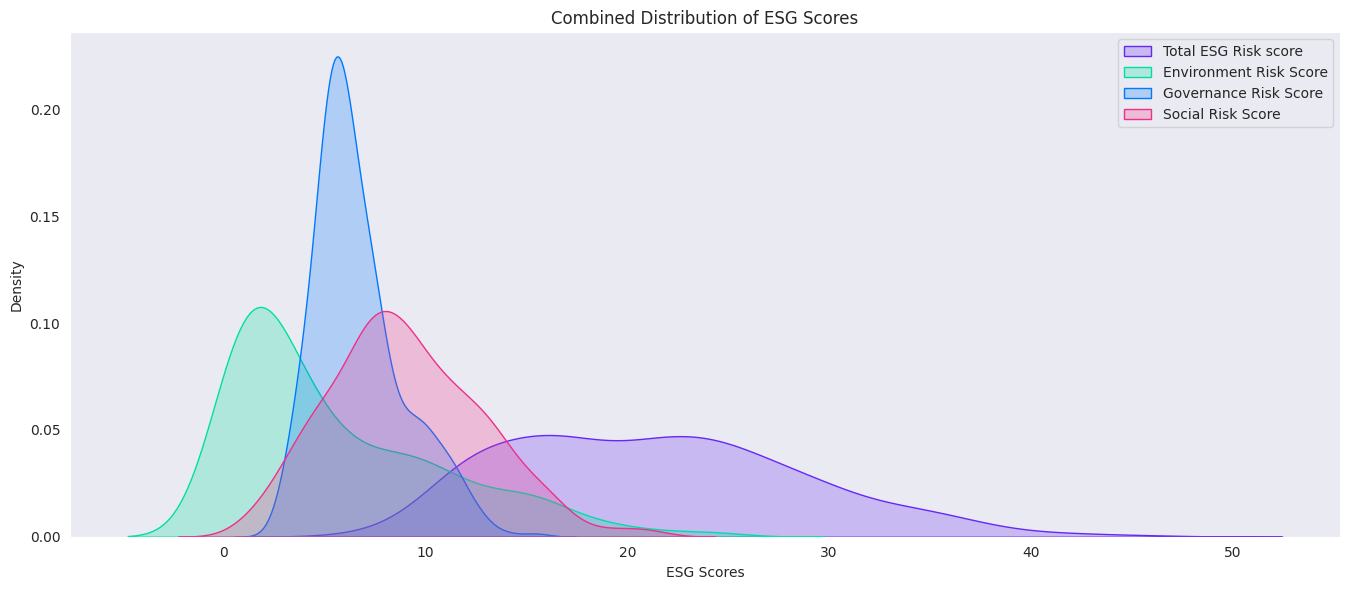

Summary Statistics for ESG Scores:
+-------+----------------------+------------------------+-----------------------+--------------------+
|       | Total ESG Risk score | Environment Risk Score | Governance Risk Score | Social Risk Score  |
+-------+----------------------+------------------------+-----------------------+--------------------+
| count |        432.0         |         432.0          |         432.0         |       432.0        |
| mean  |  21.39351851851852   |   5.675462962962963    |   6.669675925925926   | 9.023148148148149  |
|  std  |  7.247545684559173   |   5.345653287102564    |  2.2018410113011937   | 3.7908880001273215 |
|  min  |         7.0          |          0.0           |          3.0          |        1.1         |
|  25%  |         16.0         |          1.5           |          5.0          |        6.6         |
|  50%  |         21.0         |          3.8           |          6.0          |        8.7         |
|  75%  |         26.0         |      

In [5]:
esg_scores = data[['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']]

# Set style
sns.set_style("dark")

# Define a custom color palette
colors = ["#6528F7", "#00DFA2", "#0079FF", "#EF2F88"]


# Create subplots for histograms and distribution plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
plt.subplots_adjust(wspace=0.4)

# Iterate through each ESG score column
for i, col in enumerate(esg_scores.columns):
    # Plot histogram
    sns.histplot(
        esg_scores[col], 
        bins=20, 
        kde=True, 
        ax=axes[0, i], 
        color=colors[i]
    )
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].set_title(f'Distribution of {col}')


    # Plot box plot with the same color
    sns.boxplot(
        y=esg_scores[col], 
        ax=axes[1, i], 
        color=colors[i],
        saturation=0.5,
        notch=True, 
        showcaps=False,
        flierprops={"marker": "x"},
        medianprops={"color":"coral"}
    )
    axes[1, i].set_ylabel(col)
    axes[1, i].set_xlabel('')
    axes[1, i].set_title(f'Box Plot of {col}')


#  Create a single KDE plot for all ESG scores
plt.figure(figsize=(13.6, 6))

# Iterate through each ESG score column and plot its KDE
for i, col in enumerate(esg_scores.columns):
    sns.kdeplot(
        esg_scores[col],
        color=colors[i], 
        label=col, 
        fill=True
    )
    
# Add labels and a title
plt.xlabel('ESG Scores')
plt.ylabel('Density')
plt.title('Combined Distribution of ESG Scores')

# Add a legend
plt.legend()

plt.tight_layout()
plt.show()


# Identify and display outliers
outliers = {}

for col in esg_scores.columns:
    Q1 = esg_scores[col].quantile(0.25)
    Q3 = esg_scores[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    col_outliers = esg_scores[(esg_scores[col] < lower_bound) | (esg_scores[col] > upper_bound)]
    outliers[col] = col_outliers

# Display summary statistics as a nice table
summary_stats = esg_scores.describe()
print("Summary Statistics for ESG Scores:")
print(tabulate(summary_stats, headers='keys', tablefmt='pretty'))

# Display outliers as nice tables
for col, outlier_df in outliers.items():
    print(f"Outliers in {col}:")
    print(tabulate(outlier_df, headers='keys', tablefmt='pretty'))


In [6]:
# Create a copy of the original dataset
data_no_outliers = data.copy()

# Identify and remove outliers
for col in esg_scores.columns:
    Q1 = esg_scores[col].quantile(0.25)
    Q3 = esg_scores[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the copy of the dataset
    data_no_outliers = data_no_outliers[(data_no_outliers[col] >= lower_bound) & (data_no_outliers[col] <= upper_bound)]

# Reset the index of the new DataFrame
data_no_outliers.reset_index(drop=True, inplace=True)

# Display the shape of the new dataset without outliers
print(f"Shape of the dataset without outliers: {data_no_outliers.shape}")

Shape of the dataset without outliers: (407, 15)


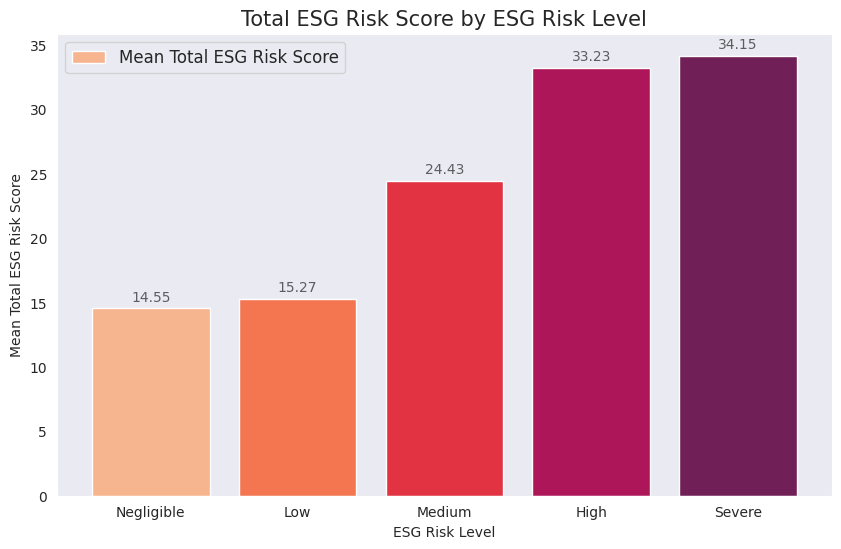

In [7]:
# Group by 'ESG Risk Level' and calculate the mean 'Total ESG Risk Score' for each level
grouped_data = data_no_outliers.groupby('ESG Risk Level')['Total ESG Risk score'].mean().reset_index()

# Define the ESG risk levels
risk_levels = ['Negligible', 'Low', 'Medium', 'High', 'Severe']

sns.set_style("dark")

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Sort the grouped data by ESG Risk Level in the desired order
grouped_data = grouped_data.loc[grouped_data['ESG Risk Level'].isin(risk_levels)]
grouped_data = grouped_data.set_index('ESG Risk Level').loc[risk_levels].reset_index()

# Use a Seaborn color palette
palette = sns.color_palette("rocket_r")  # Convert to a list of colors

# Create a bar chart for 'Total ESG Risk Score' for each risk level with the Seaborn palette
bars = ax.bar(grouped_data['ESG Risk Level'], grouped_data['Total ESG Risk score'], color=palette)

# Add labels and title
plt.xlabel('ESG Risk Level')
plt.ylabel('Mean Total ESG Risk Score')
plt.title('Total ESG Risk Score by ESG Risk Level', fontsize=15)

# Add a legend for color reference
ax.legend([f'Mean Total ESG Risk Score'], fontsize=12, loc='upper left')

# Add data labels above the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10,
                color='black', alpha=0.6)

# Show the plot
plt.show()

<a id="5"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#010966;font-family:newtimeroman;color:#237bf7;font-size:160%;text-align:center;border-radius:10px 10px;">Sector & Industry Analysis</p> 


In [8]:
# Count the number of Unique Sectors
sectors_count = data['Sector'].nunique()

print("Number of Unique Sectors:", sectors_count)

# Count the number of Unique Industries
industries_count = data['Industry'].nunique()

print("Number of Unique Industries:", industries_count)

Number of Unique Sectors: 11
Number of Unique Industries: 108


In [9]:
# Get unique sectors and their frequencies
sector_counts = data['Sector'].value_counts().reset_index()
sector_counts.columns = ['Sector', 'Frequency']

# Create a bar chart using Plotly Express
fig = px.bar(sector_counts, x='Frequency', y='Sector', orientation='h', 
             title='S&P 500 Sectors', text='Frequency',
             labels={'Frequency': 'Frequency Count', 'Sector': 'Sector'},
             color='Frequency', color_continuous_scale=px.colors.sequential.Viridis_r,
            template='plotly_dark')

# Customize the layout
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(showlegend=True)

# Show the plot
fig.show()

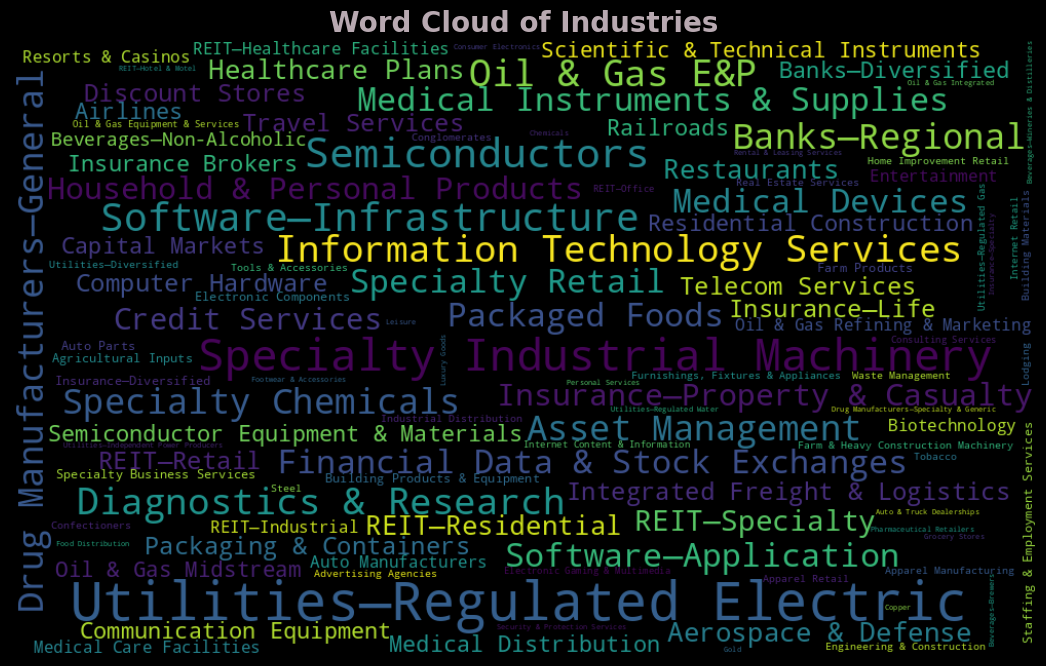

In [10]:
# Get the unique industries and their frequency counts
industry_counts = data['Industry'].value_counts()

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=600, background_color='black', colormap='viridis').generate_from_frequencies(industry_counts)

# Display the word cloud
plt.figure(figsize=(16, 8), facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Industries", color="#b8a9b1", fontsize=20, fontweight="bold")
plt.show()

In [11]:
# Calculate sector-wise average ESG scores
sector_avg_scores = data.groupby('Sector')[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].mean().reset_index()

# Calculate industry-wise average ESG scores
industry_avg_scores = data.groupby('Industry')[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].mean().reset_index()

# Define custom colors
custom_colors = {
#     'Total ESG Risk score': "#6528F7",
    'Environment Risk Score': "#00DFA2",
    'Governance Risk Score': "#0079FF",
    'Social Risk Score': "#EF2F88"
}

# Create a visual plot for sector-wise average ESG scores with custom colors and enhanced styling
fig_sector = px.bar(sector_avg_scores, x='Sector', y=['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score'],
                    title='Sector-wise Average ESG Scores',
                    labels={'value': 'Average Score', 'variable': 'ESG Component'},
                    color_discrete_map=custom_colors,
                    template='plotly_dark')  # Dark background template for a visually pleasing look

# Customize the layout
fig_sector.update_xaxes(categoryorder='total ascending')
fig_sector.update_traces(texttemplate='%{y:.2f}', textposition='outside')

# Create a visual plot for industry-wise average ESG scores with custom colors and enhanced styling
fig_industry = px.bar(industry_avg_scores, x='Industry', y=['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score'],
                      title='Industry-wise Average ESG Scores',
                      labels={'value': 'Average Score', 'variable': 'ESG Component'},
                      color_discrete_map=custom_colors,
                      template='plotly_dark')  # Dark background template for a visually pleasing look

# Customize the layout
fig_industry.update_xaxes(categoryorder='total ascending')
fig_industry.update_traces(texttemplate='%{y:.2f}', textposition='outside')

# Show the plots
fig_sector.show()
fig_industry.show()


<a id="6"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#010966;font-family:newtimeroman;color:#237bf7;font-size:160%;text-align:center;border-radius:10px 10px;">ESG Risk Level Analysis</p

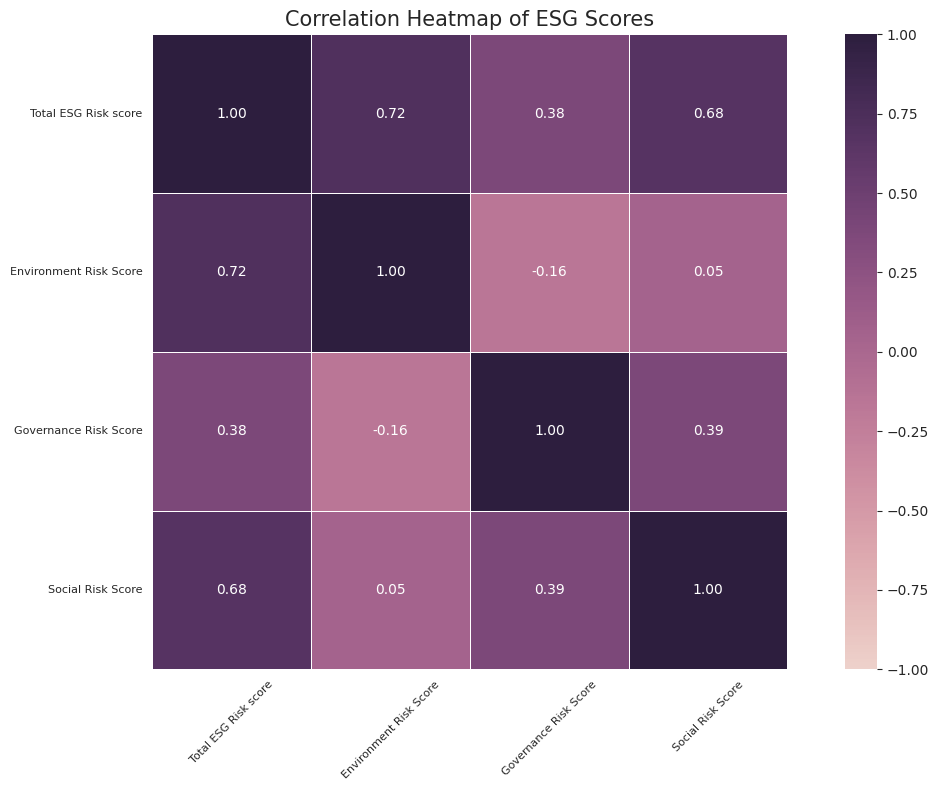

In [12]:
plt.figure(figsize=(12, 8))
sns.set_style("dark")

# Create the correlation matrix
corr = esg_scores.corr()

cmap=sns.cubehelix_palette(as_cmap=True)

sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", cbar=True, linewidths=0.5, square=True, vmin=-1, vmax=1)

plt.title("Correlation Heatmap of ESG Scores", fontsize=15)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

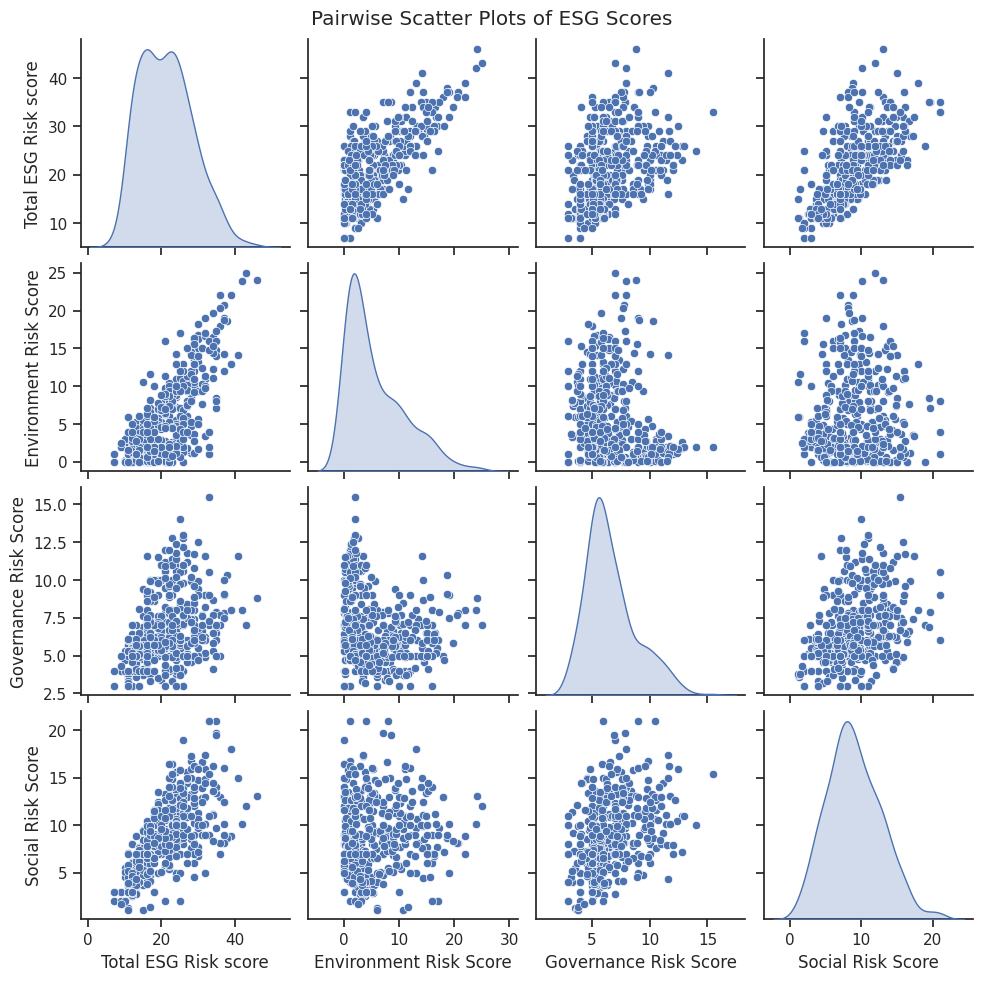

In [13]:
sns.set(style="ticks")
sns.pairplot(esg_scores, kind="scatter", diag_kind="kde", markers="o")
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairwise Scatter Plots of ESG Scores')
plt.show()

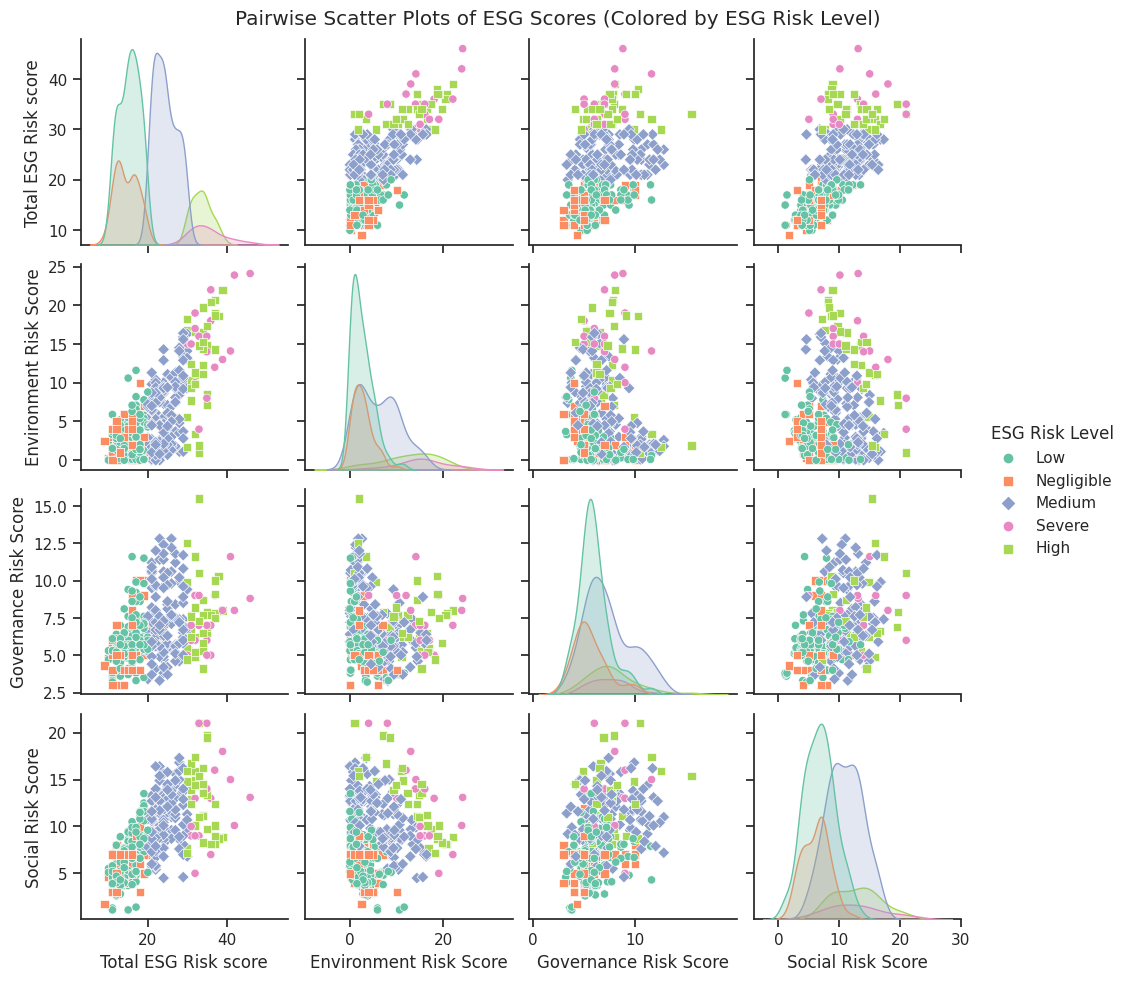

In [14]:
# Select the four ESG scores and 'ESG Risk Level' for the scatter plots
selected_columns = ['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score', 'ESG Risk Level']
esg_data = data[selected_columns]

#  Define the desired order of legend categories
legend_order = ['Negligible', 'Low', 'Medium', 'High', 'Severe']

# Create a pairplot with colored points based on 'ESG Risk Level'
sns.set(style="ticks")
sns.pairplot(esg_data, hue="ESG Risk Level", markers=["o", "s", "D"], palette="Set2", diag_kind="kde")

plt.subplots_adjust(top=0.95)
plt.suptitle('Pairwise Scatter Plots of ESG Scores (Colored by ESG Risk Level)')
plt.show()